## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!

In [240]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn_pandas import DataFrameMapper, cross_val_score

In [3]:
df = pd.read_csv("kc_house_data.csv")

In [4]:
 df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [5]:
type(df['date'][0])

str

In [6]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [7]:
# df.info()

In [8]:
#cleaning up sqft_basement data
clean = df.replace("?", np.nan)

In [9]:
clean['sqft_basement'] = clean['sqft_basement'].replace('?',np.nan).astype(float)

In [10]:
# type changes of two columns
clean["sqft_basement"].astype(float)
clean["date"] = pd.to_datetime(clean["date"])

In [11]:
#  clean.info()

In [12]:
#exploring missing values
# clean.isna().sum()

In [13]:
# clean.isnull().sum()

In [14]:
#exploring missing values of 'view'
condition_view=clean['view']!=np.nan
clean.loc[condition_view,'view'].describe()   

count    21534.000000
mean         0.233863
std          0.765686
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: view, dtype: float64

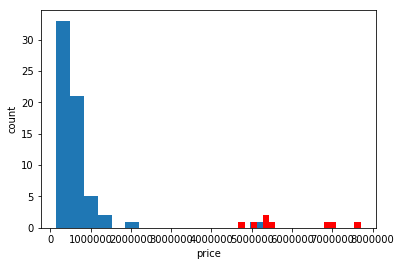

In [15]:
dataframe=clean.loc[clean['view'].isnull()==True]
plt.hist(dataframe['price'],bins=15)
plt.hist(clean.loc[clean['price']>4500000]['price'],bins=20,color='red')
plt.xlabel
plt.xlabel('price')
plt.ylabel('count')
plt.show()    #this is the reason why the points were not dropped as the price for the missing 'view' values
#were concentrated in the extreme ends and we wanted to make sure the points were included in our regression model.
# We see that one of the null view homes is one of very few high-value homes, making it useful in predicting the
# values on this end of the spectrum



In [16]:
# clean.columns

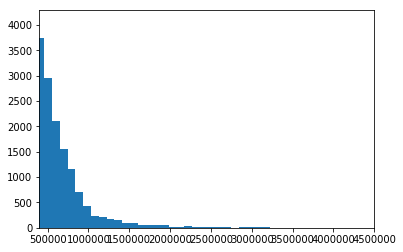

In [17]:
df_sqftbasement=clean.loc[clean['sqft_basement'].isna()==False]

plt.hist(df_sqftbasement['price'],bins=80)
plt.xlim(400000,4500000)

plt.show()

In [18]:
df_sqftbasement['sqft_basement'].describe()

count    21143.000000
mean       291.851724
std        442.498337
min          0.000000
25%          0.000000
50%          0.000000
75%        560.000000
max       4820.000000
Name: sqft_basement, dtype: float64

Since the null sqft_basement transactions are concentrated in the low end of our price (target value), we chose to retain these records and impute the median of 0.

In [19]:
clean['sqft_basement']=clean['sqft_basement'].replace(np.nan,0)

In [20]:
clean['sqft_basement'].describe() #compare this with when replace with mean

count    21597.000000
mean       285.716581
std        439.819830
min          0.000000
25%          0.000000
50%          0.000000
75%        550.000000
max       4820.000000
Name: sqft_basement, dtype: float64

In [21]:
#cleaning yr_innovated
# clean.head()

In [22]:
dataframe_yr=clean.loc[clean['yr_renovated'].isnull()].copy()

dataframe_yr.loc[dataframe_yr['yr_renovated'].isna(),'yr_renovated']=(
    dataframe_yr.loc[dataframe_yr['yr_renovated'].isnull(),'yr_built'])
dataframe_yr.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,1933,98028,47.7379,-122.233,2720,8062
12,114101516,2014-05-28,310000.0,3,1.00,1430,19901,1.5,0.0,0.0,...,7,1430,0.0,1927,1927,98028,47.7558,-122.229,1780,12697
23,8091400200,2014-05-16,252700.0,2,1.50,1070,9643,1.0,NaN,0.0,...,7,1070,0.0,1985,1985,98030,47.3533,-122.166,1220,8386
26,1794500383,2014-06-26,937000.0,3,1.75,2450,2691,2.0,0.0,0.0,...,8,1750,700.0,1915,1915,98119,47.6386,-122.360,1760,3573
28,5101402488,2014-06-24,438000.0,3,1.75,1520,6380,1.0,0.0,0.0,...,7,790,730.0,1948,1948,98115,47.6950,-122.304,1520,6235


In [23]:
clean.loc[clean['yr_renovated'].isna(),'yr_renovated']=(
    clean.loc[clean['yr_renovated'].isnull(),'yr_built'])

clean.loc[clean['yr_renovated']==0,'yr_renovated']=(
    clean.loc[clean['yr_renovated']==0,'yr_built'])
clean.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,1955.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,1933.0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,1965.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,1987.0,98074,47.6168,-122.045,1800,7503


In [24]:
clean['view_clean']=clean['view']
clean.loc[clean['view_clean'].isna(),'view_clean']=0
print(clean['view_clean'].isna().sum(),clean['view'].isna().sum())

0 63


In [25]:
clean['waterfront_clean']=clean['waterfront']
clean.loc[clean['waterfront_clean'].isna(),'waterfront_clean']=0
# clean.describe().T

In [26]:
# clean.columns

In [27]:
# def replace_yr_ren(yr_ren,yr_built):
#     """takes two lists and if yr_ren is np.nan, it returns yr_built"""
#     output=[]
#     for index,year in enumerate(yr_ren):
#         if year.isnull() or year==0:
#             output.append(yr_built[index])
#         else:
#             output.append(year)
#     return output

In [28]:
# clean[['yr_renovated','yr_built']].head()


In [29]:
# np.array(replace_yr_ren(clean['yr_renovated'],clean['yr_built'])).value_counts()

In [30]:
# clean['yr_rennovated_clean'] = replace_yr_ren(clean['yr_renovated'],clean['yr_built'])
# clean.head()

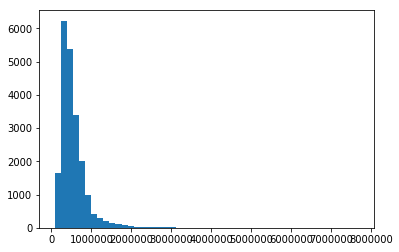

In [31]:
#graph for the price for the missing 'sqft_basement' values
plt.hist(df_sqftbasement['price'],bins=50)
plt.show()
#the graph shows us the missing sqft_basement are concentrated in low priced homes

In [32]:
#we could replace the np.nan values of 'view' with 0 but we would like to take a look..
#how the values of price change for the missing values of view


In [33]:
#creating a flag column for waterfront, first approach
clean["imputed_waterfront"] = clean["waterfront"].replace(np.nan, 0)

#creating a flag column for waterfront, second approach, needs error resolution
#clean["imputed_waterfront_2"] = clean.loc[clean["waterfront"] == np.nan]

#imputing waterfront records to median value, which is zero
clean["waterfront"].replace(np.nan, 0, inplace = True)

In [34]:
#check if a new column with a headline 'imputed_waterfront' is created
clean.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'view_clean',
       'waterfront_clean', 'imputed_waterfront'],
      dtype='object')

In [35]:
#To view the two columns 'waterfront'
clean[['waterfront']].isna().sum()

waterfront    0
dtype: int64

In [36]:
clean['sqft_basement'].isna().sum()

0

In [37]:
clean.isna().sum()

id                     0
date                   0
price                  0
bedrooms               0
bathrooms              0
sqft_living            0
sqft_lot               0
floors                 0
waterfront             0
view                  63
condition              0
grade                  0
sqft_above             0
sqft_basement          0
yr_built               0
yr_renovated           0
zipcode                0
lat                    0
long                   0
sqft_living15          0
sqft_lot15             0
view_clean             0
waterfront_clean       0
imputed_waterfront     0
dtype: int64

In [38]:
clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 24 columns):
id                    21597 non-null int64
date                  21597 non-null datetime64[ns]
price                 21597 non-null float64
bedrooms              21597 non-null int64
bathrooms             21597 non-null float64
sqft_living           21597 non-null int64
sqft_lot              21597 non-null int64
floors                21597 non-null float64
waterfront            21597 non-null float64
view                  21534 non-null float64
condition             21597 non-null int64
grade                 21597 non-null int64
sqft_above            21597 non-null int64
sqft_basement         21597 non-null float64
yr_built              21597 non-null int64
yr_renovated          21597 non-null float64
zipcode               21597 non-null int64
lat                   21597 non-null float64
long                  21597 non-null float64
sqft_living15         21597 non-null int64
sqft

In [39]:
clean.to_csv('cleaneddata.csv')
df_clean=pd.read_csv('cleaneddata.csv')

In [40]:
import folium
import webbrowser

In [41]:
clean.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'view_clean',
       'waterfront_clean', 'imputed_waterfront'],
      dtype='object')

In [42]:
# housing_map=folium.Map(location=[df['lat'],df['long']],zoom_starts=5)

In [43]:
clean_ohe=pd.read_csv('clean_ohe.csv')

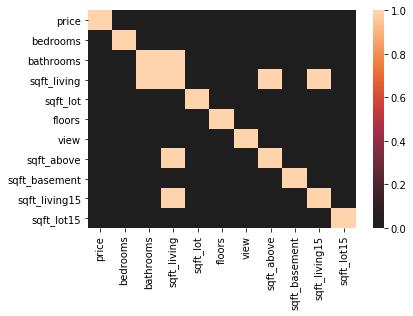

In [44]:
clean_model_one=clean.drop(['id','lat','long','waterfront','yr_built','yr_renovated',
                            'grade','condition','zipcode','view_clean','waterfront_clean','imputed_waterfront']
                           ,axis=1)
import seaborn as sns
sns.heatmap(abs(clean_model_one.corr())>0.75,center=0);

In [45]:
clean_model_one.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,sqft_above,sqft_basement,sqft_living15,sqft_lot15
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.395734,0.605368,0.321108,0.585241,0.082845
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,0.078523,0.479386,0.297229,0.393406,0.030690
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.186451,0.686668,0.278485,0.569884,0.088303
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.282532,0.876448,0.428660,0.756402,0.184342
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.075298,0.184139,0.015031,0.144763,0.718204
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.028436,0.523989,-0.241866,0.280102,-0.010722
view,0.395734,0.078523,0.186451,0.282532,0.075298,0.028436,1.000000,0.166299,0.271689,0.279561,0.073332
sqft_above,0.605368,0.479386,0.686668,0.876448,0.184139,0.523989,0.166299,1.000000,-0.051175,0.731767,0.195077
sqft_basement,0.321108,0.297229,0.278485,0.428660,0.015031,-0.241866,0.271689,-0.051175,1.000000,0.199288,0.015885
sqft_living15,0.585241,0.393406,0.569884,0.756402,0.144763,0.280102,0.279561,0.731767,0.199288,1.000000,0.183515


In [46]:
##'bathrooms' and 'sqft_living' are highly correlated. 
#'sqft_above' and 'sqft_living' are highly correlated
#'sqft_living' and 'sqft_living15' are highly correlated. 
#price and sqft_living have higher linear associate than the other three features so we could drop those two
#To avoidmulticollinarity

In [47]:
from statsmodels.formula.api import ols

In [48]:
#'clean data with no categorical features'

outcome='price'
x_cols=['bedrooms','bathrooms','sqft_living','sqft_lot','sqft_above','sqft_basement',
        'sqft_living15','sqft_lot15']
predictors='+'.join(x_cols)
formula=outcome + "~" + predictors
model=ols(formula=formula,data=clean_model_one).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     2903.
Date:                Thu, 22 Aug 2019   Prob (F-statistic):               0.00
Time:                        13:02:25   Log-Likelihood:            -2.9950e+05
No. Observations:               21597   AIC:                         5.990e+05
Df Residuals:                   21588   BIC:                         5.991e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2.766e+04   7754.688      3.566      0.000    1.25e+04    4.29e+04
bedrooms      -5.928e+04   2341.179    -25.319      0.000   -6.39e+04   -5.47e+04
bathrooms      7131.8298   3506.509      2.034      0.042     258.814     1.4e+04
sqft_living     262.7887     22.717     11.568      0.000     218.262     307.315
sqft_lot          0.0421      0.060      0.697      0.486      -0.076       0.161
sqft_above        3.8286     22.656      0.169      0.866     -40.580      48.237
sqft_basement    45.7628     22.684      2.017      0.044       1.300      90.226
sqft_living15    71.2139      3.987     17.861      0.000      63.399      79.029
sqft_lot15       -0.8794      0.092     -9.534      0.000      -1.060      -0.699
==============================================================================
Omnibus:                    15010.461   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           600245.560
Skew:                           2.850   Prob(JB):                         0.00
Kurtosis:                      28.190   Cond. No.                     2.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
#'clean data with no categorical features after taking out:
#'bathrooms','sqft_living','sqft_lot','sqft_above','sqft_living15'
outcome='price'
x_cols=['bedrooms','sqft_living','sqft_lot','sqft_basement','sqft_lot15']

predictors='+'.join(x_cols)
formula=outcome + "~" + predictors
model=ols(formula=formula,data=clean_model_one).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     4513.
Date:                Thu, 22 Aug 2019   Prob (F-statistic):               0.00
Time:                        13:02:25   Log-Likelihood:            -2.9967e+05
No. Observations:               21597   AIC:                         5.993e+05
Df Residuals:                   21591   BIC:                         5.994e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      9.306e+04   6699.486     13.890      0.000    7.99e+04    1.06e+05
bedrooms      -6.135e+04   2328.640    -26.347      0.000   -6.59e+04   -5.68e+04
sqft_living     315.9054      2.536    124.552      0.000     310.934     320.877
sqft_lot         -0.0097      0.061     -0.160      0.873      -0.129       0.109
sqft_basement    24.7208      4.420      5.593      0.000      16.057      33.384
sqft_lot15       -0.7762      0.093     -8.379      0.000      -0.958      -0.595
==============================================================================
Omnibus:                    14222.618   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           472328.768
Skew:                           2.687   Prob(JB):                         0.00
Kurtosis:                      25.271   Cond. No.                     2.01e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.01e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
#model with ALL categorical features except Zipcode
outcome='price'
x_cols=['bedrooms','bathrooms','sqft_living','sqft_lot','floors','condition','grade','sqft_above',
        'sqft_basement','yr_built','yr_renovated','sqft_living15','sqft_lot15','waterfront_clean','view_clean']
predictors='+'.join(x_cols)
formula=outcome + "~" + predictors
model=ols(formula=formula,data=clean_ohe).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     2722.
Date:                Thu, 22 Aug 2019   Prob (F-statistic):               0.00
Time:                        13:02:25   Log-Likelihood:            -2.9592e+05
No. Observations:               21597   AIC:                         5.919e+05
Df Residuals:                   21581   BIC:                         5.920e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         6.239e+06   1.39e+05     44.949      0.000    5.97e+06    6.51e+06
bedrooms         -3.951e+04   2035.663    -19.409      0.000   -4.35e+04   -3.55e+04
bathrooms         4.647e+04   3507.992     13.248      0.000    3.96e+04    5.33e+04
sqft_living        111.8945     19.400      5.768      0.000      73.869     149.920
sqft_lot            -0.0025      0.051     -0.049      0.961      -0.103       0.098
floors            2.699e+04   3792.163      7.117      0.000    1.96e+04    3.44e+04
condition         1.985e+04   2498.416      7.946      0.000     1.5e+04    2.47e+04
grade             1.207e+05   2258.697     53.451      0.000    1.16e+05    1.25e+05
sqft_above          48.6060     19.372      2.509      0.012      10.636      86.576
sqft_basement       55.5655     19.225      2.890      0.004      17.883      93.248
yr_built         -3891.0174    135.145    -28.791      0.000   -4155.912   -3626.123
yr_renovated       294.5986    140.299      2.100      0.036      19.602     569.595
sqft_living15       24.4931      3.604      6.795      0.000      17.428      31.558
sqft_lot15          -0.5578      0.078     -7.113      0.000      -0.712      -0.404
waterfront_clean   6.15e+05   1.95e+04     31.612      0.000    5.77e+05    6.53e+05
view_clean        4.384e+04   2252.965     19.460      0.000    3.94e+04    4.83e+04
==============================================================================
Omnibus:                    16300.759   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1172211.210
Skew:                           3.030   Prob(JB):                         0.00
Kurtosis:                      38.580   Cond. No.                     4.77e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.77e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
#took out 'sqft_above' feature
outcome='price'
x_cols=['bedrooms','bathrooms','sqft_living','sqft_lot','floors','condition','grade',
        'sqft_basement','yr_built','yr_renovated','sqft_living15','sqft_lot15','waterfront_clean','view_clean']
predictors='+'.join(x_cols)
formula=outcome + "~" + predictors
model=ols(formula=formula,data=clean_ohe).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     2916.
Date:                Thu, 22 Aug 2019   Prob (F-statistic):               0.00
Time:                        13:02:25   Log-Likelihood:            -2.9593e+05
No. Observations:               21597   AIC:                         5.919e+05
Df Residuals:                   21582   BIC:                         5.920e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         6.231e+06   1.39e+05     44.896      0.000    5.96e+06     6.5e+06
bedrooms         -3.954e+04   2035.887    -19.420      0.000   -4.35e+04   -3.55e+04
bathrooms         4.608e+04   3504.960     13.148      0.000    3.92e+04     5.3e+04
sqft_living        159.5806      3.895     40.975      0.000     151.947     167.214
sqft_lot         -2.323e-05      0.051     -0.000      1.000      -0.101       0.100
floors            2.794e+04   3773.621      7.404      0.000    2.05e+04    3.53e+04
condition         1.967e+04   2497.648      7.875      0.000    1.48e+04    2.46e+04
grade             1.208e+05   2258.673     53.493      0.000    1.16e+05    1.25e+05
sqft_basement        8.6719      4.508      1.924      0.054      -0.165      17.509
yr_built         -3883.0132    135.124    -28.737      0.000   -4147.866   -3618.160
yr_renovated       290.5302    140.307      2.071      0.038      15.518     565.542
sqft_living15       25.0453      3.598      6.961      0.000      17.993      32.098
sqft_lot15          -0.5584      0.078     -7.119      0.000      -0.712      -0.405
waterfront_clean  6.157e+05   1.95e+04     31.649      0.000    5.78e+05    6.54e+05
view_clean        4.361e+04   2251.372     19.371      0.000    3.92e+04     4.8e+04
==============================================================================
Omnibus:                    16328.990   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1180266.124
Skew:                           3.037   Prob(JB):                         0.00
Kurtosis:                      38.703   Cond. No.                     4.77e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.77e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

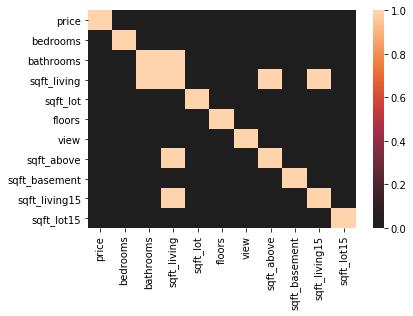

In [52]:
clean_model_one=clean.drop(['id','lat','long','waterfront','yr_built','yr_renovated',
                            'grade','condition','zipcode','view_clean','waterfront_clean','imputed_waterfront']
                           ,axis=1)
import seaborn as sns
sns.heatmap(abs(clean_model_one.corr())>0.75,center=0);

In [53]:
# x_cols=[col for col in clean_ohe.columns if col!='sqft_above']

In [54]:

x_condition=[col for col in clean_ohe.columns if col not in ['sqft_above','id','date','price']]
# x_condition 
x_value=pd.DataFrame(clean_ohe,columns=x_condition)
X=x_value.values 
y=clean_ohe.iloc[:,2].values.reshape(-1,1)

In [55]:
from sklearn.preprocessing import StandardScaler
import numpy as np


In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [57]:
sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [60]:
y_pred=lr.predict(X_test)

In [61]:
import statsmodels.api as sm

X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     1060.
Date:                Thu, 22 Aug 2019   Prob (F-statistic):               0.00
Time:                        13:02:27   Log-Likelihood:            -2.8961e+05
No. Observations:               21597   AIC:                         5.794e+05
Df Residuals:                   21511   BIC:                         5.801e+05
Df Model:                          85                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -2.41e+07   6.09e+06     -3.954      0.0

In [62]:
# x_cols=[col for col in clean_ohe.columns if col!='sqft_above']
# clean_ohe[x_cols[1:13]].hist(figsize  = [12, 12]);

# x_cols[1:13]


In [63]:
# outcome='price'
# x_cols=[col for col in clean_ohe.columns if col!='sqft_above']
# predictors='+'.join(x_cols)
# formula=outcome + "~" + predictors
# model=ols(formula=formula,data=clean_ohe).fit()
# # model.summary()

In [64]:

x_condition=[col for col in clean_ohe.columns if col not in ['sqft_above','id','date','price']]
# x_condition 
x_value=pd.DataFrame(clean_ohe,columns=x_condition)
X=x_value.values 
y=clean_ohe.iloc[:,2].values.reshape(-1,1)
test_size=[0.05,0.1,0.15,0.2,0.25]

for i in test_size:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = i, random_state = 0)
    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)

    lr=LinearRegression()
    lr.fit(X_train,y_train)
    y_pred=lr.predict(X_test)
    

    model = sm.OLS(y_train, X_train).fit()
    predictions = model.predict(X_test) 
    print_model = model.summary()
    print(i,print_model)
    

0.05                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     82.31
Date:                Thu, 22 Aug 2019   Prob (F-statistic):               0.00
Time:                        13:02:27   Log-Likelihood:            -3.0080e+05
No. Observations:               20517   AIC:                         6.018e+05
Df Residuals:                   20432   BIC:                         6.025e+05
Df Model:                          85                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          -2.53e+04   5127.913     -4.934    

0.1                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     78.68
Date:                Thu, 22 Aug 2019   Prob (F-statistic):               0.00
Time:                        13:02:28   Log-Likelihood:            -2.8502e+05
No. Observations:               19437   AIC:                         5.702e+05
Df Residuals:                   19352   BIC:                         5.709e+05
Df Model:                          85                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -2.523e+04   5276.172     -4.783     

0.15                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     75.36
Date:                Thu, 22 Aug 2019   Prob (F-statistic):               0.00
Time:                        13:02:28   Log-Likelihood:            -2.6923e+05
No. Observations:               18357   AIC:                         5.386e+05
Df Residuals:                   18272   BIC:                         5.393e+05
Df Model:                          85                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          -2.59e+04   5443.589     -4.758    

0.2                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     70.55
Date:                Thu, 22 Aug 2019   Prob (F-statistic):               0.00
Time:                        13:02:29   Log-Likelihood:            -2.5339e+05
No. Observations:               17277   AIC:                         5.070e+05
Df Residuals:                   17192   BIC:                         5.076e+05
Df Model:                          85                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          -2.52e+04   5599.380     -4.501     

0.25                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     66.15
Date:                Thu, 22 Aug 2019   Prob (F-statistic):               0.00
Time:                        13:02:29   Log-Likelihood:            -2.3758e+05
No. Observations:               16197   AIC:                         4.753e+05
Df Residuals:                   16112   BIC:                         4.760e+05
Df Model:                          85                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -2.628e+04   5785.389     -4.542    

In [65]:
#Once the basemodel was established, 
#we started looking at the assumptions made for a multivariate regression model

# Assumption 1: feature(s) vs target have linear relationship (corr>0.5)

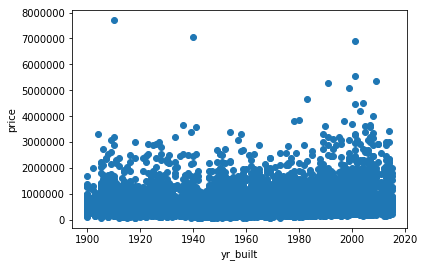

In [66]:
plt.scatter(clean_ohe['yr_built'],clean_ohe['price'])
plt.xlabel('yr_built')
plt.ylabel('price')
plt.show()

In [67]:
clean_ohe['price_log']=np.log(clean_ohe['price']) #to see if log transformation would be best
clean_ohe[['waterfront_clean','price','price_log']].corr()

,waterfront_clean,price,price_log
waterfront_clean,1.000000,0.264306,0.170720
price,0.264306,1.000000,0.891745
price_log,0.170720,0.891745,1.000000


In [68]:
#the log transformation makes the correlation worse,therefore we have decided to drop 'waterfront_view'was dropped

In [69]:
clean_ohe['age_house']=2019-clean_ohe['yr_built'] #converting 'yr_built' to 'age of house'

Text(0.5, 1.0, 'age_house vs price_log')

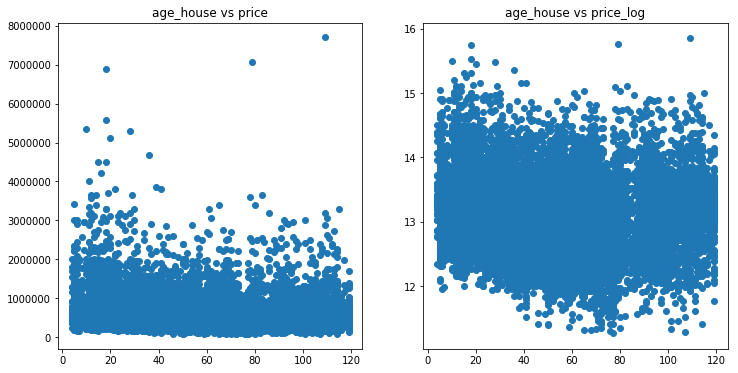

In [70]:
fig,axs=plt.subplots(1,2,figsize=(12,6))
axs[0].scatter(clean_ohe['age_house'],clean_ohe['price'])
axs[0].set_title('age_house vs price')
axs[1].scatter(clean_ohe['age_house'],clean_ohe['price_log'])
axs[1].set_title('age_house vs price_log')

In [71]:
clean_ohe['age_house_log']=np.log(clean_ohe['age_house'])

In [72]:
clean_ohe[['age_house','price','price_log']].corr()
#age_house dropped! because linearly not related to price/logprice

,age_house,price,price_log
age_house,1.000000,-0.053953,-0.080583
price,-0.053953,1.000000,0.891745
price_log,-0.080583,0.891745,1.000000


In [73]:
clean_ohe['age_renovated']=2019-clean['yr_renovated']
clean_ohe[['yr_renovated','price','price_log']].corr()   #log(price) improves it!

,yr_renovated,price,price_log
yr_renovated,1.000000,0.097541,0.122027
price,0.097541,1.000000,0.891745
price_log,0.122027,0.891745,1.000000


In [74]:
clean_ohe[['view_clean','price','price_log']].corr()

,view_clean,price,price_log
view_clean,1.000000,0.393497,0.344653
price,0.393497,1.000000,0.891745
price_log,0.344653,0.891745,1.000000


In [75]:
clean_ohe.columns   
#accidently dropped (['sqft_above','id','date','yr_built','waterfront_clean','price_log','age_house','age_house_log',
#'age_renovated','yr_renovated','view_clean'],axis=1,inplace=False)


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'waterfront_clean', 'view_clean',
       'zipcode_98001', 'zipcode_98002', 'zipcode_98003', 'zipcode_98004',
       'zipcode_98005', 'zipcode_98006', 'zipcode_98007', 'zipcode_98008',
       'zipcode_98010', 'zipcode_98011', 'zipcode_98014', 'zipcode_98019',
       'zipcode_98022', 'zipcode_98023', 'zipcode_98024', 'zipcode_98027',
       'zipcode_98028', 'zipcode_98029', 'zipcode_98030', 'zipcode_98031',
       'zipcode_98032', 'zipcode_98033', 'zipcode_98034', 'zipcode_98038',
       'zipcode_98039', 'zipcode_98040', 'zipcode_98042', 'zipcode_98045',
       'zipcode_98052', 'zipcode_98053', 'zipcode_98055', 'zipcode_98056',
       'zipcode_98058', 'zipcode_98059', 'zipcode_98065', 'zipcode_98070',
       'zipcode_98072', 'zipcode_98074', 'zipcode_9

In [76]:

# x_condition=[col for col in clean_ohe.columns if col!='price']
# # x_condition 
# x_value=pd.DataFrame(clean_ohe,columns=x_condition)
# X=x_value.values 
# y=clean_ohe.iloc[:,2].values.reshape(-1,1)
# test_size=[0.05,0.1,0.15,0.2,0.25]

# for i in test_size:
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = i, random_state = 0)
#     sc_X = StandardScaler()
#     X_train = sc_X.fit_transform(X_train)
#     X_test = sc_X.transform(X_test)

#     lr=LinearRegression()
#     lr.fit(X_train,y_train)
#     y_pred=lr.predict(X_test)
    

#     model = sm.OLS(y_train, X_train).fit()
#     predictions = model.predict(X_test) 
#     print_model = model.summary()
#     print(i,print_model)

In [77]:
model_two=clean_ohe.copy()

In [78]:
model_two.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'waterfront_clean', 'view_clean',
       'zipcode_98001', 'zipcode_98002', 'zipcode_98003', 'zipcode_98004',
       'zipcode_98005', 'zipcode_98006', 'zipcode_98007', 'zipcode_98008',
       'zipcode_98010', 'zipcode_98011', 'zipcode_98014', 'zipcode_98019',
       'zipcode_98022', 'zipcode_98023', 'zipcode_98024', 'zipcode_98027',
       'zipcode_98028', 'zipcode_98029', 'zipcode_98030', 'zipcode_98031',
       'zipcode_98032', 'zipcode_98033', 'zipcode_98034', 'zipcode_98038',
       'zipcode_98039', 'zipcode_98040', 'zipcode_98042', 'zipcode_98045',
       'zipcode_98052', 'zipcode_98053', 'zipcode_98055', 'zipcode_98056',
       'zipcode_98058', 'zipcode_98059', 'zipcode_98065', 'zipcode_98070',
       'zipcode_98072', 'zipcode_98074', 'zipcode_9

In [79]:
model_two.iloc[:,13:].head()

,yr_renovated,lat,long,sqft_living15,sqft_lot15,waterfront_clean,view_clean,zipcode_98001,zipcode_98002,zipcode_98003,...,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,price_log,age_house,age_house_log,age_renovated
0,1955.0,47.5112,-122.257,1340,5650,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,12.309982,64,4.158883,64.0
1,1991.0,47.7210,-122.319,1690,7639,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,13.195614,68,4.219508,28.0
2,1933.0,47.7379,-122.233,2720,8062,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,12.100712,86,4.454347,86.0
3,1965.0,47.5208,-122.393,1360,5000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,13.311329,54,3.988984,54.0
4,1987.0,47.6168,-122.045,1800,7503,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,13.142166,32,3.465736,32.0


In [80]:
# x_condition=[col for col in model_two.columns]
# # x_condition ONLY ZIP CODES!
# x_value=pd.DataFrame(model_two,columns=x_condition)
# X=x_value.values 
# y=clean_ohe.iloc[:,2].values.reshape(-1,1)
# test_size=[0.05,0.1,0.15,0.2,0.25]

# for i in test_size:
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = i, random_state = 0)
#     sc_X = StandardScaler()
#     X_train = sc_X.fit_transform(X_train)
#     X_test = sc_X.transform(X_test)

#     lr=LinearRegression()
#     lr.fit(X_train,y_train)
#     y_pred=lr.predict(X_test)
    

#     model = sm.OLS(y_train, X_train).fit()
#     predictions = model.predict(X_test) 
#     print_model = model.summary()
#     print(i,print_model)

In [81]:
model_three=clean_ohe.copy()


In [82]:
model_three.iloc[:,0:13].head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0.0,1955
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400.0,1951
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,3,6,770,0.0,1933
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910.0,1965
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0.0,1987


In [83]:
# x_condition=[col for col in model_two.columns if col!='price']
# # x_condition MINUS ZIP CODES!
# x_value=pd.DataFrame(model_three,columns=x_condition)
# X=x_value.values 
# y=model_three.iloc[:,0].values.reshape(-1,1)
# test_size=[0.05,0.1,0.15,0.2,0.25]

# for i in test_size:
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = i, random_state = 0)
#     sc_X = StandardScaler()
#     X_train = sc_X.fit_transform(X_train)
#     X_test = sc_X.transform(X_test)

#     lr=LinearRegression()
#     lr.fit(X_train,y_train)
#     y_pred=lr.predict(X_test)
    

#     model = sm.OLS(y_train, X_train).fit()
#     predictions = model.predict(X_test) 
#     print_model = model.summary()
#     print(i,print_model)

In [84]:
model_three.corr()[0:13].head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,...,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,price_log,age_house,age_house_log,age_renovated
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.023803,0.008188,-0.010799,...,-0.053707,-0.024527,-0.011133,-0.002729,0.022782,-0.049660,-0.003751,-0.021617,-0.032145,-0.020022
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.036056,0.667951,0.605368,...,-0.091703,0.040503,-0.069286,-0.054438,-0.074064,0.083688,0.891745,-0.053953,-0.098269,-0.097541
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,0.026496,0.356563,0.479386,...,-0.045699,0.002700,-0.008118,0.005210,-0.023639,-0.021325,0.343360,-0.155670,-0.137641,-0.164392
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,-0.126479,0.665838,0.686668,...,-0.099712,-0.002250,-0.055332,-0.026073,-0.048801,0.008278,0.551249,-0.507173,-0.514128,-0.532389
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,-0.059445,0.762779,0.876448,...,-0.074826,0.028933,-0.042364,-0.024066,-0.041815,0.010832,0.695185,-0.318152,-0.314100,-0.339146


In [85]:
# x_condition=[col for col in model_two.columns if col!=['price','sqft_lot15','bathrooms',
#                                                        'sqft_living15','grade','lat','long']]
# # x_condition MINUS ZIP CODES!
# x_value=pd.DataFrame(model_three,columns=x_condition)
# X=x_value.values 
# y=model_three.iloc[:,0].values.reshape(-1,1)
# test_size=[0.05,0.1,0.15,0.2,0.25]

# for i in test_size:
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = i, random_state = 0)
#     sc_X = StandardScaler()
#     X_train = sc_X.fit_transform(X_train)
#     X_test = sc_X.transform(X_test)

#     lr=LinearRegression()
#     lr.fit(X_train,y_train)
#     y_pred=lr.predict(X_test)
    

#     model = sm.OLS(y_train, X_train).fit()
#     predictions = model.predict(X_test) 
#     print_model = model.summary()
#     print(i,print_model)

In [86]:
#BILL GATES
billgates_latitude=47.62774
billgates_longitude=-122.24194

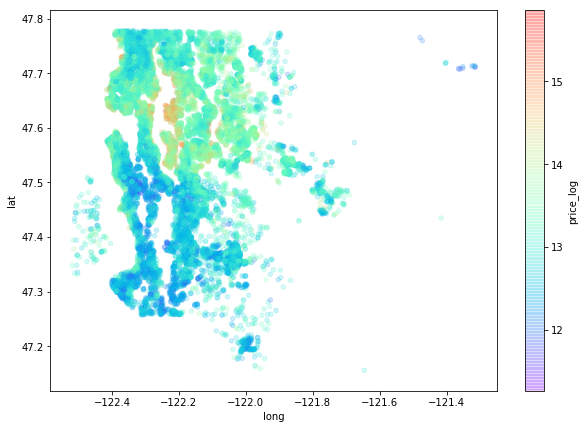

In [293]:
model_three.plot(kind='scatter',x='long',y='lat',alpha=0.2,figsize=(10,7),c='price_log',
                 cmap=plt.get_cmap('rainbow'),colorbar=True,sharex=False)


# plt.scatter(data=model_two, x='long', y='lat', alpha=0.2, c='price_log',
#                  cmap=plt.get_cmap('rainbow'))
# plt.legend()
# plt.xlabel('Longtitude',fontsize=14)
# plt.ylabel('Latitude',fontsize=14)


# ax.scatter(x=billgates_longitude, y=billgates_latitude, color='black',s=50)

# model_three.plot(kind='scatter',x='long',y='lat',alpha=0.2,c='price_log',
#                  cmap=plt.get_cmap('rainbow'),colorbar=True,sharex=False,figsize=(10,6))

# plt.plot(kind='scatter',x=billgates_longitude,y=billgates_latitude,alpha=1,color='black',s=500)
# plt.ylabel('latitude')
# plt.xlabel('longtitude')

In [255]:
plt.xlabel?

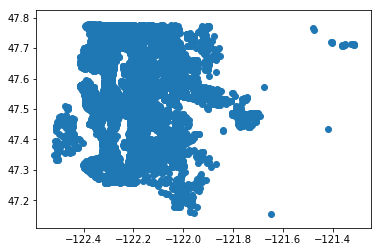

In [88]:
fig, ax = plt.subplots()
ax.scatter(data=model_two, x='long',y='lat')

In [89]:
model_two['price_log'].max()

15.856730886823913

In [90]:
#BILL GATES
billgates_latitude=47.37
billgates_longitude=-122.14

In [96]:
model_two['date']=pd.to_datetime(model_two['date'])

In [97]:
model_two['date'][0]

Timestamp('2014-10-13 00:00:00')

In [98]:
model_two['year_sold']=model_two['date'].dt.year

In [99]:
model_two['year_sold'][0]

2014

In [ ]:
!pip install haversine
# model_two['distance_from_billgates']=((Latitude-model_two['lat'])**2+(Longitude-model_two['long'])**2)

In [100]:
from haversine import haversine

In [101]:
lat=model_two['lat'][1]
long=model_two['long'][1]

In [102]:
haversine((lat,long),(billgates_latitude,billgates_longitude))

41.2771444387256

In [103]:
(lat,long),(billgates_latitude,billgates_longitude)

((47.721000000000004, -122.319), (47.37, -122.14))

In [104]:
model_two[['lat','long']].head()

,lat,long
0,47.5112,-122.257
1,47.7210,-122.319
2,47.7379,-122.233
3,47.5208,-122.393
4,47.6168,-122.045


In [105]:
model_two['distance_from_billgates']=model_two.apply(
    lambda row: haversine((row['lat'], row['long']), (billgates_latitude, billgates_longitude)), axis=1)

In [106]:
model_two[['distance_from_billgates']].head()

,distance_from_billgates
0,17.998333
1,41.277144
2,41.499731
3,25.360385
4,28.355935


In [107]:
model_two['distance_from_billgates_log']=np.log(model_two['distance_from_billgates'])

In [108]:
model_two[['distance_from_billgates_log','price','price_log']].corr()

,distance_from_billgates_log,price,price_log
distance_from_billgates_log,1.000000,0.278002,0.398966
price,0.278002,1.000000,0.891745
price_log,0.398966,0.891745,1.000000


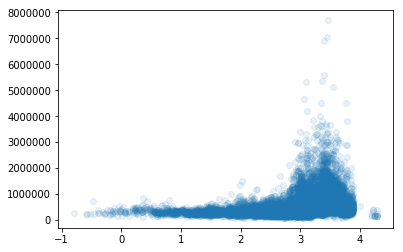

In [109]:
plt.scatter(data=model_two,x='distance_from_billgates_log',y='price',alpha=0.1)

In [110]:
model_two['lat'].values

array([47.5112, 47.721 , 47.7379, ..., 47.5944, 47.5345, 47.5941])

In [ ]:
# plt.scatter(model_three['long'],model_three['price'])

In [ ]:
# plt.scatter(model_three['lat']/model_three['long'],model_three['price'])
# plt.xlim(-0.394,-0.386)

In [ ]:
# traffic_map = folium.Map(location=[47.4095, -122.315], zoom_start=5)


In [ ]:
# m = folium.Map(location=[20, 0], tiles="Mapbox Bright", zoom_start=2)
 
# # I can add marker one by one on the map
# for i in range(0,len(df_folium)):
#     folium.Marker([df_folium.iloc[i]['long'], df_folium.iloc[i]['lat']], popup=clean.iloc[i]['zipcode']).add_to(m)
 
# # Save it as html
# m.save('312_markers_on_folium_map1.html')


we are creating a model based on price_log and distance_from_billgates_log

In [111]:
model_two.columns


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'waterfront_clean', 'view_clean',
       'zipcode_98001', 'zipcode_98002', 'zipcode_98003', 'zipcode_98004',
       'zipcode_98005', 'zipcode_98006', 'zipcode_98007', 'zipcode_98008',
       'zipcode_98010', 'zipcode_98011', 'zipcode_98014', 'zipcode_98019',
       'zipcode_98022', 'zipcode_98023', 'zipcode_98024', 'zipcode_98027',
       'zipcode_98028', 'zipcode_98029', 'zipcode_98030', 'zipcode_98031',
       'zipcode_98032', 'zipcode_98033', 'zipcode_98034', 'zipcode_98038',
       'zipcode_98039', 'zipcode_98040', 'zipcode_98042', 'zipcode_98045',
       'zipcode_98052', 'zipcode_98053', 'zipcode_98055', 'zipcode_98056',
       'zipcode_98058', 'zipcode_98059', 'zipcode_98065', 'zipcode_98070',
       'zipcode_98072', 'zipcode_98074', 'zipcode_9

In [112]:
model_two['sqft_living_log']=np.log(model_two['sqft_living'])
model_two['sqft_lot_log']=np.log(model_two['sqft_lot'])

In [224]:
x_condition

['bedrooms',
 'floors',
 'condition',
 'sqft_basement',
 'waterfront_clean',
 'view_clean',
 'zipcode_98001',
 'zipcode_98002',
 'zipcode_98003',
 'zipcode_98004',
 'zipcode_98005',
 'zipcode_98006',
 'zipcode_98007',
 'zipcode_98008',
 'zipcode_98010',
 'zipcode_98011',
 'zipcode_98014',
 'zipcode_98019',
 'zipcode_98022',
 'zipcode_98023',
 'zipcode_98024',
 'zipcode_98027',
 'zipcode_98028',
 'zipcode_98029',
 'zipcode_98030',
 'zipcode_98031',
 'zipcode_98032',
 'zipcode_98033',
 'zipcode_98034',
 'zipcode_98038',
 'zipcode_98039',
 'zipcode_98040',
 'zipcode_98042',
 'zipcode_98045',
 'zipcode_98052',
 'zipcode_98053',
 'zipcode_98055',
 'zipcode_98056',
 'zipcode_98058',
 'zipcode_98059',
 'zipcode_98065',
 'zipcode_98070',
 'zipcode_98072',
 'zipcode_98074',
 'zipcode_98075',
 'zipcode_98077',
 'zipcode_98092',
 'zipcode_98102',
 'zipcode_98103',
 'zipcode_98105',
 'zipcode_98106',
 'zipcode_98107',
 'zipcode_98108',
 'zipcode_98109',
 'zipcode_98112',
 'zipcode_98115',
 'zipcod

In [180]:
from sklearn.metrics import mean_squared_error

x_condition=[col for col in model_two.columns if not col in ['price','distance_from_billgates','yr_renovated',
                                                             'yr_built','price_log',
                                           'sqft_lot15','sqft_lot','bathrooms', 'sqft_living15', 'sqft_above',
                                           'grade','lat','long', 'id', 'date', 'sqft_living','age_house',
                                            'year_sold','age_house_log']]

x_values=pd.DataFrame(model_two,columns=x_condition)
# x_value=model_two['distance_from_billgates_log']
X=x_values.values 
y=model_two['price_log']
# # test_size=[0.05,0.1,0.15,0.2,0.25]

# # for i in test_size:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

lr=LinearRegression()
lr.fit(X_train,y_train)

y_pred_test=lr.predict(X_test)
y_pred_train=lr.predict(X_train)


print('R-squared train data:', lr.score(X_train,y_train))
print('\n')
print('R_squared test data',lr.score(X_test,y_test))
print('\n')
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

print('Train_MSE:',train_mse)
print('\n')
print('Test_MSE:',test_mse)





R-squared train data: 0.8610195238056407


R_squared test data 0.8576455680582398


Train_MSE: 0.03882012244618354


Test_MSE: 0.038279395501970646


In [234]:
df_zip=model_two.loc[:,'zipcode_98001':'zipcode_98199']
df_zip.head()

,zipcode_98001,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [237]:
from sklearn.metrics import mean_squared_error

x_condition=['bedrooms', 'floors', 'condition', 'sqft_basement', 'waterfront_clean','view_clean','age_renovated',
       'distance_from_billgates_log', 'sqft_living_log', 'sqft_lot_log']
# x_zip


# x_values=pd.DataFrame(model_two,columns=x_condition)
# x_value=model_two['distance_from_billgates_log']
# X=x_values.values 
y=model_two['price_log']
# # test_size=[0.05,0.1,0.15,0.2,0.25]

# # for i in test_size:


# X_test = sc.transform(X_test)

# scale the non-zip conditions
non_zip_df = pd.DataFrame(model_two,columns=x_condition)
sc = StandardScaler()
non_zip_df_sc = sc.fit_transform(non_zip_df)

# put all the conditions together
Xzip = pd.concat((pd.DataFrame(non_zip_df_sc), pd.DataFrame(df_zip)), axis=1)
X=Xzip.values 
#



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


lr=LinearRegression()
lr.fit(X_train,y_train)

y_pred_test=lr.predict(X_test)
y_pred_train=lr.predict(X_train)


print('R-squared train data:', lr.score(X_train,y_train))
print('\n')
print('R_squared test data',lr.score(X_test,y_test))
print('\n')
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

print('Train_MSE:',train_mse)
print('\n')
print('Test_MSE:',test_mse)



R-squared train data: 0.8610194960210303


R_squared test data 0.8576491186656111


Train_MSE: 0.038820130207000064


Test_MSE: 0.038278440736446394


In [228]:
x_values.columns

Index(['bedrooms', 'floors', 'condition', 'sqft_basement', 'waterfront_clean',
       'view_clean', 'zipcode_98001', 'zipcode_98002', 'zipcode_98003',
       'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007',
       'zipcode_98008', 'zipcode_98010', 'zipcode_98011', 'zipcode_98014',
       'zipcode_98019', 'zipcode_98022', 'zipcode_98023', 'zipcode_98024',
       'zipcode_98027', 'zipcode_98028', 'zipcode_98029', 'zipcode_98030',
       'zipcode_98031', 'zipcode_98032', 'zipcode_98033', 'zipcode_98034',
       'zipcode_98038', 'zipcode_98039', 'zipcode_98040', 'zipcode_98042',
       'zipcode_98045', 'zipcode_98052', 'zipcode_98053', 'zipcode_98055',
       'zipcode_98056', 'zipcode_98058', 'zipcode_98059', 'zipcode_98065',
       'zipcode_98070', 'zipcode_98072', 'zipcode_98074', 'zipcode_98075',
       'zipcode_98077', 'zipcode_98092', 'zipcode_98102', 'zipcode_98103',
       'zipcode_98105', 'zipcode_98106', 'zipcode_98107', 'zipcode_98108',
       'zipcode_98109', 

In [238]:
ziped_name_coef=zip(lr.coef_, x_values.columns)
list_coef_name=list((ziped_name_coef))
list_coef_name.sort(reverse=True)
list_coef_name

[(0.07000723497392138, 'view_clean'),
 (0.03902790256924302, 'waterfront_clean'),
 (0.029834260746909393, 'condition'),
 (0.0034696208511934556, 'floors'),
 (-0.022291143827697604, 'bedrooms'),
 (-0.04534991001638472, 'sqft_basement'),
 (-3909991550.1136804, 'distance_from_billgates_log'),
 (-4455050988.527524, 'sqft_living_log'),
 (-4831602886.232151, 'sqft_lot_log'),
 (-5374822899.749941, 'age_renovated')]

In [206]:
coef=lr.coef_

In [162]:
y.values.shape

(21597,)

In [163]:
y_pred_train.shape

(17277,)

In [246]:
residuals_train=y_train-y_pred_train
residuals_test=y_test-y_pred_test


In [114]:


X=model_two['distance_from_billgates_log'].values
y=model_two['price']
# # test_size=[0.05,0.1,0.15,0.2,0.25]

# # for i in test_size:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train.reshape(-1,1))
X_test = sc.transform(X_test.reshape(-1,1))

lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

lr.score(X_test,y_test)

0.08253920121810909

In [344]:


x_values=pd.DataFrame(model_two,columns=x_condition)
# x_value=model_two['distance_from_billgates_log']
X=x_values.values 
y=model_two['price_log']
# # test_size=[0.05,0.1,0.15,0.2,0.25]

# # for i in test_size:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

lr=LinearRegression()
lr.fit(X_train,y_train)

y_pred_test=lr.predict(X_test)
y_pred_train=lr.predict(X_train)


print('R-squared train data:', lr.score(X_train,y_train))
print('\n')
print('R_squared test data',lr.score(X_test,y_test))
print('\n')
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

print('Train_MSE:',train_mse)
print('\n')
print('Test_MSE:',test_mse)

coefficeints=lr.coef_.tolist()

list_coeff=list(zip(coefficeints,x_condition))
list_coeff.sort(reverse=True)
list_coeff

R-squared train data: 0.6649938836436549


R_squared test data 0.6609845787714879


Train_MSE: 0.093574139427949


Test_MSE: 0.09116193442985068


[(0.379954431006371, 'sqft_living_log'),
 (0.1962155082735942, 'distance_from_billgates_log'),
 (0.07300921073340073, 'view_clean'),
 (0.04404569140518296, 'floors'),
 (0.04142700093372742, 'age_renovated'),
 (0.03948173620702899, 'condition'),
 (0.03103415956645364, 'waterfront_clean'),
 (-0.022738801618114615, 'sqft_basement'),
 (-0.024369964448058917, 'sqft_lot_log'),
 (-0.03969481903507261, 'bedrooms')]

In [346]:
X_train.tolist()

[[-0.40250848675815487,
  -0.9174939925927503,
  -0.630344340741621,
  3.552606070559456,
  11.957215394899615,
  4.912861092084969,
  -1.1424145168256656,
  0.06271349240329537,
  1.6185055458948039,
  1.714850925273633],
 [-0.40250848675815487,
  -0.9174939925927503,
  -0.630344340741621,
  -0.6518251177354422,
  -0.08363151176708945,
  -0.30463317361367775,
  0.6471821095119251,
  -0.11143531163801638,
  -1.876749503122434,
  0.28577771587200024],
 [-0.40250848675815487,
  -0.9174939925927503,
  -0.630344340741621,
  0.05194036194674928,
  -0.08363151176708945,
  -0.30463317361367775,
  -0.419692802343177,
  -0.4968297428509149,
  -0.6125209277665995,
  -0.07527978123775492],
 [-0.40250848675815487,
  -0.9174939925927503,
  -0.630344340741621,
  0.3470678211683134,
  -0.08363151176708945,
  -0.30463317361367775,
  0.2686135924020502,
  0.9121810839543693,
  -0.35444746183532305,
  -0.5569749983978899],
 [0.6655515847701273,
  0.011398108785799268,
  2.4330759616474045,
  1.345960760

In [342]:
def multiple_linear_regression(x_features,y,df):
    
    """This function takes in a list of the column names of features(x),
    dataframe of target(y) and dataframe(df),
    it prints mean-squared-error(MSE) for both training and testing dataset,
    it print the coffeicient of determination(r_squared) for both training and
    testing dataset and also, it outputs the features"""
    
#     assert isinstance(x_features, list)
#     assert isinstance(y, pd.DataFrame)
#     assert isinstance(df, DataFrame)


    
    x_values=pd.DataFrame(df, columns=x_features) #creates a dataframe of x_values
    X=x_values.values 
    y=y

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    lr=LinearRegression()
    lr.fit(X_train, y_train)

    y_pred_test=lr.predict(X_test)
    y_pred_train=lr.predict(X_train)


    print('R-squared train data:', lr.score(X_train, y_train))
    print('\n')
    print('R_squared test data', lr.score(X_test, y_test))
    print('\n')
    
    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)

    print('Train_MSE:', train_mse)
    print('\n')
    print('Test_MSE:', test_mse)

    coefficeints=lr.coef_.tolist()
    coefficeints_round=[round(val,3) for val in coefficeints]
    list_coeff=list(zip(coefficeints_round, x_condition))
    list_coeff.sort(reverse=True)
    print('\n')
    print(list_coeff[0:4])
    
    

In [347]:
x_features=['bedrooms', 'floors', 'condition', 'sqft_basement', 'waterfront_clean','view_clean','age_renovated',
       'distance_from_billgates_log', 'sqft_living_log', 'sqft_lot_log']
y=model_two['price_log']
df=model_two
multiple_linear_regression(x_features,y,df)

R-squared train data: 0.6649938836436549


R_squared test data 0.6609845787714879


Train_MSE: 0.093574139427949


Test_MSE: 0.09116193442985068


[(0.38, 'sqft_living_log'), (0.196, 'distance_from_billgates_log'), (0.073, 'view_clean'), (0.044, 'floors')]


In [356]:
model_two.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'waterfront_clean', 'view_clean',
       'zipcode_98001', 'zipcode_98002', 'zipcode_98003', 'zipcode_98004',
       'zipcode_98005', 'zipcode_98006', 'zipcode_98007', 'zipcode_98008',
       'zipcode_98010', 'zipcode_98011', 'zipcode_98014', 'zipcode_98019',
       'zipcode_98022', 'zipcode_98023', 'zipcode_98024', 'zipcode_98027',
       'zipcode_98028', 'zipcode_98029', 'zipcode_98030', 'zipcode_98031',
       'zipcode_98032', 'zipcode_98033', 'zipcode_98034', 'zipcode_98038',
       'zipcode_98039', 'zipcode_98040', 'zipcode_98042', 'zipcode_98045',
       'zipcode_98052', 'zipcode_98053', 'zipcode_98055', 'zipcode_98056',
       'zipcode_98058', 'zipcode_98059', 'zipcode_98065', 'zipcode_98070',
       'zipcode_98072', 'zipcode_98074', 'zipcode_9

In [ ]:
def Standard_Scaler(data_frame)


In [ ]:
[col for col in ]